In [31]:
import ect
from ect.optimizers import ECTFilterOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/20
ect_offset = radius/10

n_knots = 20

In [32]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [33]:
opt = ECTFilterOptimizer(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
    do_fnf=False
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


In [ ]:
result

      fun: -27.296459843868046
 hess_inv: array([[ 9.92952477, -1.98381468,  0.88227119, -1.82420511,  0.09412717,
        -0.74367965, -0.90806635, -0.87536249, -0.91531541, -0.89945465,
        -0.91721957, -0.90971618, -0.89736046, -0.88542129, -0.89759052,
        -0.90251831, -0.88857319, -0.91259237, -0.87607821, -0.83035159],
       [-1.98381468,  3.94261141, -0.19608506,  0.56942174,  0.59595597,
        -0.4151302 , -0.47511212, -0.4633016 , -0.46556578, -0.47277077,
        -0.45928745, -0.47261257, -0.46661559, -0.4725496 , -0.46987461,
        -0.4683903 , -0.47482256, -0.46561064, -0.46812052, -0.43590733],
       [ 0.88227119, -0.19608506,  5.02025651, -1.11754691, -0.09803616,
        -0.55044636, -0.71077141, -0.68493248, -0.69527227, -0.70049132,
        -0.69142366, -0.70276235, -0.69016948, -0.69931798, -0.69616986,
        -0.69624331, -0.69924823, -0.69880512, -0.68861369, -0.64807882],
       [-1.82420511,  0.56942174, -1.11754691,  5.5841257 ,  0.06709511,
      

opt.loss(solution)=-27.296459843868046


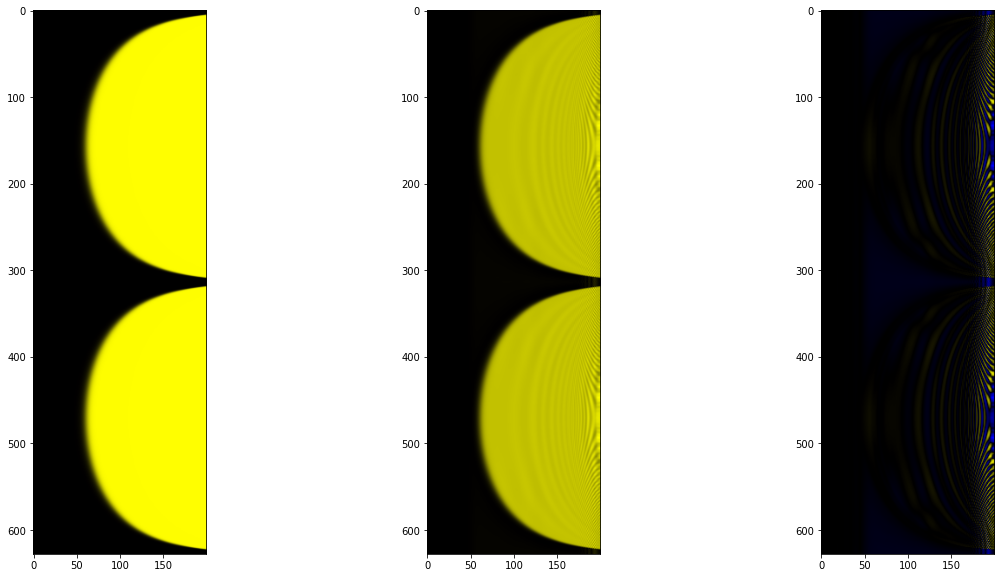

In [ ]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [ ]:
res = opt.inv

knots_space = solution
snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_space=}")

knots_space=array([-0.02964351,  0.02118927, -0.04175362,  0.07997589, -0.17897674,
        0.90941593,  1.29804547,  1.31406009,  1.3379698 ,  1.33937766,
        1.33262008,  1.34596099,  1.32900826,  1.33720259,  1.33591072,
        1.33741814,  1.33716985,  1.33488982,  1.31693231,  1.24352904])


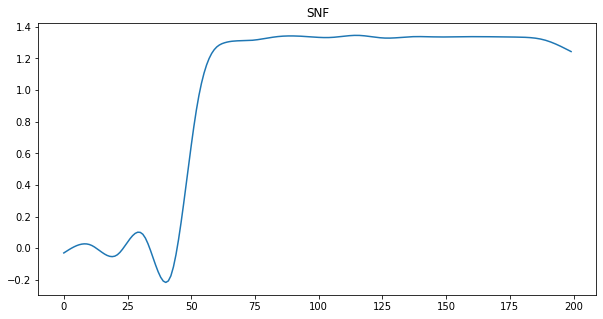

In [ ]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("FNF")
# plt.plot(fnf[0,:])

# plt.subplot(1, 2, 2)
plt.title("SNF")
plt.plot(snf[0,:])

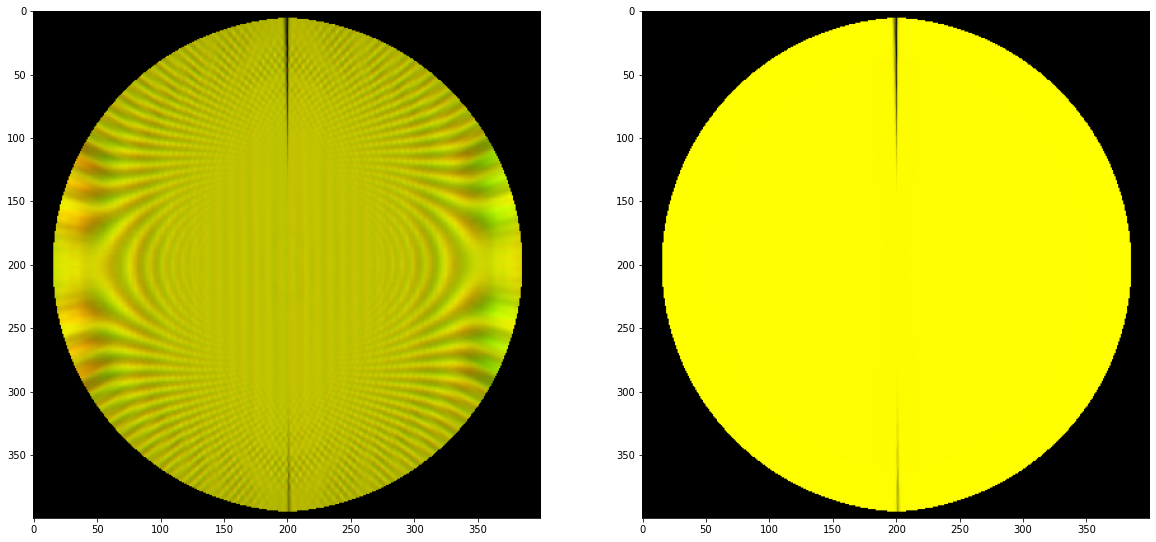

In [ ]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)

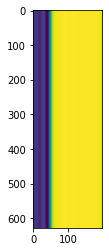

In [ ]:
plt.imshow(snf)

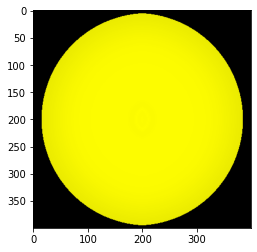

In [ ]:
plt.imshow(ect.ilogpolar(ect.complex_to_hsv(snf), radius=radius, offset=img_offset))